In [ ]:
%matplotlib widget 

/tmp/ipykernel_4157524/1879168698.py:19: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
/tmp/ipykernel_4157524/1879168698.py:19: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
/tmp/ipykernel_4157524/1879168698.py:19: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can av

  set_id  method  I_value  r_value
0  Set 1    :ac:      5.5    0.375
1  Set 1  :acsh:      8.8    0.293
2  Set 1    :sh:      7.7    0.335
0  Set 2    :ac:      3.5    0.446
1  Set 2  :acsh:      4.6    0.394
2  Set 2    :sh:      4.3    0.457
0  Set 3    :ac:      5.0    0.393
1  Set 3  :acsh:      8.3    0.293
2  Set 3    :sh:      7.0    0.338
0  Set 4    :ac:      5.0    0.385
1  Set 4  :acsh:      7.6    0.313
2  Set 4    :sh:      6.6    0.366


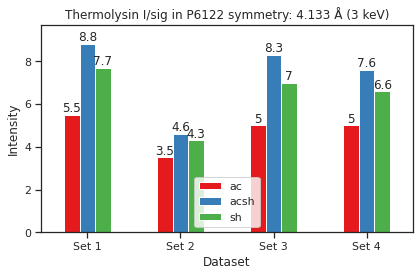

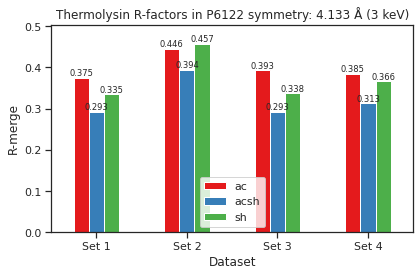

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Put the path to your data files here
file_paths = [
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/csvs/3p0_10_I_and_r_merge.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/csvs/3p0_11_I_and_r_merge.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/csvs/3p0_12_I_and_r_merge.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/csvs/3p0_16_I_and_r_merge.csv'
]

# Read and concatenate all datasets, adding a 'set_id' to distinguish them
all_data = []
methods = ['method:acsh:', 'method:sh:', 'method:ac:']

for i, file_path in enumerate(file_paths, start=1):
    df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
    df['set_id'] = f"Set {i}"  # Adding a set identifier
    all_data.append(df)

# Concatenating all the dataframes
combined_data = pd.concat(all_data)
print(combined_data)

ac = combined_data[combined_data['method']==':ac:']
acsh = combined_data[combined_data['method']==':acsh:']
sh = combined_data[combined_data['method']==':sh:']

sns.set_style("darkgrid")
sns.set(palette='Set1', style='ticks')
ax = pd.DataFrame({'ac':list(ac['I_value']), 'acsh':list(acsh['I_value']), 'sh':list(sh['I_value'])}, index=list(ac['set_id']))
ax = ax.plot(kind='bar', legend=True, figsize=(6,4))
plt.title(f'Thermolysin I/sig in P6122 symmetry: 4.133 Å (3 keV)')
ax.legend(loc='lower center')
plt.xlabel('Dataset')
plt.ylabel('Intensity')
plt.xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
lim = ax.get_ylim()
ax.set_ylim(lim[0], lim[1]*1.05)
plt.tight_layout()
plt.savefig('/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/plots/3p0_I_over_sigma.png')
plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P6122/3p0_I_over_sigma.png', dpi=300)
plt.show()


sns.set_style("darkgrid")
sns.set(palette='Set1', style='ticks')
ax2 = pd.DataFrame({'ac':list(ac['r_value']), 'acsh':list(acsh['r_value']), 'sh':list(sh['r_value'])}, index=list(ac['set_id']))
ax2 = ax2.plot(kind='bar', legend=True, figsize=(6,4))
plt.title(f'Thermolysin R-factors in P6122 symmetry: 4.133 Å (3 keV)')
ax2.legend(loc='lower center')
plt.xlabel('Dataset')
plt.ylabel('R-merge')
plt.xticks(rotation=0)
for container in ax2.containers:
    ax2.bar_label(container, fontsize='x-small')
lim = ax2.get_ylim()
ax2.set_ylim(lim[0], lim[1]*1.05)
plt.tight_layout()
plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P6122/3p0_rmerges.png', dpi=300)
plt.savefig('/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/plots/3p0_rmerges.png')
plt.show()

/tmp/ipykernel_4157524/3824921122.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
/tmp/ipykernel_4157524/3824921122.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
/tmp/ipykernel_4157524/3824921122.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can av

  set_id  method  I_value  r_value
0  Set 1    :ac:      3.9    0.397
1  Set 1  :acsh:      5.4    0.345
2  Set 1    :sh:      3.9    0.411
0  Set 2    :ac:      4.2    0.390
1  Set 2  :acsh:      5.6    0.341
2  Set 2    :sh:      4.1    0.407
0  Set 3    :ac:      4.4    0.369
1  Set 3  :acsh:      6.4    0.312
2  Set 3    :sh:      5.6    0.339
0  Set 4    :ac:      3.7    0.435
1  Set 4  :acsh:      4.9    0.390
2  Set 4    :sh:      4.9    0.438
0  Set 5    :ac:      3.6    0.413
1  Set 5  :acsh:      5.3    0.357
2  Set 5    :sh:      3.9    0.394


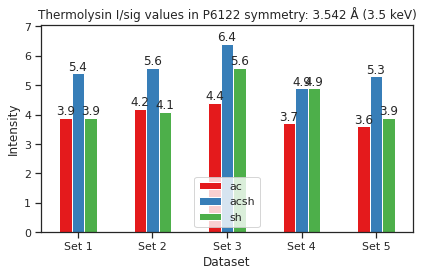

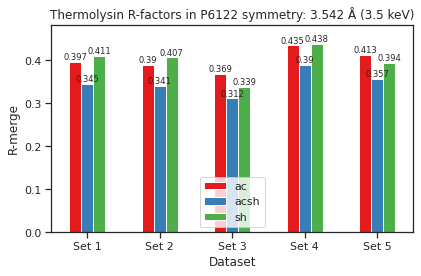

In [5]:
# Put the path to your data files here
file_paths = [
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/csvs/3p5_1_I_and_r_merge.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/csvs/3p5_2_I_and_r_merge.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/csvs/3p5_3_I_and_r_merge.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/csvs/3p5_4_I_and_r_merge.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/csvs/3p5_5_I_and_r_merge.csv'
]

# Read and concatenate all datasets, adding a 'set_id' to distinguish them
all_data = []
methods = ['method:acsh:', 'method:sh:', 'method:ac:']

for i, file_path in enumerate(file_paths, start=1):
    df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
    df['set_id'] = f"Set {i}"  # Adding a set identifier
    all_data.append(df)

# Concatenating all the dataframes
combined_data = pd.concat(all_data)
print(combined_data)

ac = combined_data[combined_data['method']==':ac:']
acsh = combined_data[combined_data['method']==':acsh:']
sh = combined_data[combined_data['method']==':sh:']

sns.set_style("darkgrid")
sns.set(palette='Set1', style='ticks')
ax = pd.DataFrame({'ac':list(ac['I_value']), 'acsh':list(acsh['I_value']), 'sh':list(sh['I_value'])}, index=list(ac['set_id']))
ax = ax.plot(kind='bar', legend=True, figsize=(6,4))
plt.title(f'Thermolysin I/sig values in P6122 symmetry: 3.542 Å (3.5 keV)')
ax.legend(loc='lower center')
plt.xlabel('Dataset')
plt.ylabel('Intensity')
plt.xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
lim = ax.get_ylim()
ax.set_ylim(lim[0], lim[1]*1.05)
plt.tight_layout()
plt.savefig('/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/plots/3p5_I_over_sigma.png')
plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P6122/3p5_I_over_sigma.png', dpi=300)
plt.show()

sns.set_style("darkgrid")
sns.set(palette='Set1', style='ticks')
ax2 = pd.DataFrame({'ac':list(ac['r_value']), 'acsh':list(acsh['r_value']), 'sh':list(sh['r_value'])}, index=list(ac['set_id']))
ax2 = ax2.plot(kind='bar', legend=True, figsize=(6,4))
plt.title(f'Thermolysin R-factors in P6122 symmetry: 3.542 Å (3.5 keV)')
ax2.legend(loc='lower center')
plt.xlabel('Dataset')
plt.ylabel('R-merge')
plt.xticks(rotation=0)
for container in ax2.containers:
    ax2.bar_label(container, fontsize='x-small')
lim = ax2.get_ylim()
ax2.set_ylim(lim[0], lim[1]*1.05)
plt.tight_layout()
plt.savefig('/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/plots/3p5_rmerges.png')
plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P6122/3p5_rmerges.png', dpi=300)
plt.show()

/tmp/ipykernel_4157524/2592797884.py:20: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
/tmp/ipykernel_4157524/2592797884.py:20: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
/tmp/ipykernel_4157524/2592797884.py:20: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can av

  set_id  method  I_value  r_value
0  Set 1    :ac:      3.8    0.379
1  Set 1  :acsh:      5.4    0.330
2  Set 1    :sh:      3.7    0.390
0  Set 2    :ac:      3.8    0.382
1  Set 2  :acsh:      4.9    0.338
2  Set 2    :sh:      3.6    0.406
0  Set 3    :ac:      4.5    0.356
1  Set 3  :acsh:      6.6    0.306
2  Set 3    :sh:      6.0    0.322
0  Set 4    :ac:      3.6    0.416
1  Set 4  :acsh:      4.6    0.373
2  Set 4    :sh:      4.2    0.526
0  Set 5    :ac:      3.8    0.390
1  Set 5  :acsh:      5.8    0.335
2  Set 5    :sh:      5.0    0.357


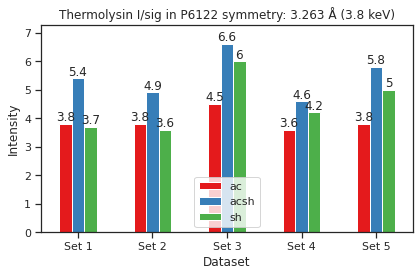

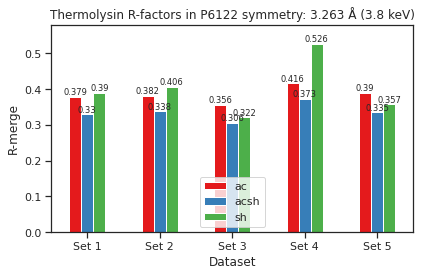

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Put the path to your data files here
file_paths = [
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/csvs/3p8_1_I_and_r_merge.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/csvs/3p8_2_I_and_r_merge.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/csvs/3p8_3_I_and_r_merge.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/csvs/3p8_4_I_and_r_merge.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/csvs/3p8_5_I_and_r_merge.csv'
]

# Read and concatenate all datasets, adding a 'set_id' to distinguish them
all_data = []
methods = ['method:acsh:', 'method:sh:', 'method:ac:']

for i, file_path in enumerate(file_paths, start=1):
    df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
    df['set_id'] = f"Set {i}"  # Adding a set identifier
    all_data.append(df)

# Concatenating all the dataframes
combined_data = pd.concat(all_data)
print(combined_data)

ac = combined_data[combined_data['method']==':ac:']
acsh = combined_data[combined_data['method']==':acsh:']
sh = combined_data[combined_data['method']==':sh:']

sns.set_style("darkgrid")
sns.set(palette='Set1', style='ticks')
ax = pd.DataFrame({'ac':list(ac['I_value']), 'acsh':list(acsh['I_value']), 'sh':list(sh['I_value'])}, index=list(ac['set_id']))
ax = ax.plot(kind='bar', legend=True, figsize=(6,4))
plt.title(f'Thermolysin I/sig in P6122 symmetry: 3.263 Å (3.8 keV)')
ax.legend(loc='lower center')
plt.xlabel('Dataset')
plt.ylabel('Intensity')
plt.xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
lim = ax.get_ylim()
ax.set_ylim(lim[0], lim[1]*1.05)
plt.tight_layout()
plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P6122/3p8_I_over_sigma.png', dpi=300)
plt.savefig('/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/plots/3p8_I_over_sigma.png')
plt.show()


sns.set_style("darkgrid")
sns.set(palette='Set1', style='ticks')
ax2 = pd.DataFrame({'ac':list(ac['r_value']), 'acsh':list(acsh['r_value']), 'sh':list(sh['r_value'])}, index=list(ac['set_id']))
ax2 = ax2.plot(kind='bar', legend=True, figsize=(6,4))
plt.title(f'Thermolysin R-factors in P6122 symmetry: 3.263 Å (3.8 keV)')
ax2.legend(loc='lower center')
plt.xlabel('Dataset')
plt.ylabel('R-merge')
plt.xticks(rotation=0)
for container in ax2.containers:
    ax2.bar_label(container, fontsize='x-small')
lim = ax2.get_ylim()
ax2.set_ylim(lim[0], lim[1]*1.05)
plt.tight_layout()
plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P6122/3p8_rmerges.png', dpi=300)
plt.savefig('/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/plots/3p8_rmerges.png')
plt.show()